In [1]:
import torch
import torch.nn as nn 
import torch.nn.functional as F 

In [2]:
# Neural network class
class simple_nn(nn.Module):
    def __init__(self, input_features = 4, h1 = 8, h2 = 8, out_features = 3):
        super().__init__()
        self.fc1 = nn.Linear(input_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.fc3 = nn.Linear(h2, out_features)


    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        out = self.fc3(x)

        return out



In [3]:
torch.manual_seed(42)

In [4]:
model = simple_nn()

In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [6]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
my_df = pd.read_csv(url)

In [7]:
my_df

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
columns_list = ["sepal.length", "sepal.width", "petal.length", "petal.width", "variety"]
my_df.columns = columns_list
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
my_df.variety.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
my_df.variety = my_df.variety.replace("Iris-setosa" , 0.0)
my_df.variety = my_df.variety.replace("Iris-versicolor" , 1.0)
my_df.variety = my_df.variety.replace("Iris-virginica" , 2.0)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,4.9,3.0,1.4,0.2,0.0
1,4.7,3.2,1.3,0.2,0.0
2,4.6,3.1,1.5,0.2,0.0
3,5.0,3.6,1.4,0.2,0.0
4,5.4,3.9,1.7,0.4,0.0
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,2.0
145,6.3,2.5,5.0,1.9,2.0
146,6.5,3.0,5.2,2.0,2.0
147,6.2,3.4,5.4,2.3,2.0


In [11]:
#Train test split 
X = my_df.drop(["variety"], axis = 1)
y = my_df["variety"]

In [12]:
#Convert X to numpy values
X = X.values
y = y.values

In [13]:
#Train test split
X_train, X_test , y_train,y_test = train_test_split(X, y, test_size =0.2)

In [14]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [15]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [16]:
#Set the criterion of the model to measure the error, how far off the prediction from actual
criterion = nn.CrossEntropyLoss()
#Optimizer  
#Choose adam optimizer , lr = learning rate 
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)


In [17]:
model.parameters ## gives our model structure

<bound method Module.parameters of simple_nn(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=3, bias=True)
)>

In [18]:
#Train our model
# Epochs 
epochs = 500
losses = []
for i  in range(epochs):
    #Predict results
    y_pred = model.forward(X_train)
    
    #Measure losses
    loss = criterion(y_pred, y_train)
    losses.append(loss.detach().numpy())

    #print for every 10 epochs
    if (i%10 ==0):
        print(f'Epoch : {i} and loss ; {loss}')

    #Back propoagtion take error and give it back 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()



Epoch : 0 and loss ; 1.1840317249298096
Epoch : 10 and loss ; 1.1801478862762451
Epoch : 20 and loss ; 1.1764092445373535
Epoch : 30 and loss ; 1.172749638557434
Epoch : 40 and loss ; 1.1691598892211914
Epoch : 50 and loss ; 1.1656681299209595
Epoch : 60 and loss ; 1.1623488664627075
Epoch : 70 and loss ; 1.1591997146606445
Epoch : 80 and loss ; 1.156253457069397
Epoch : 90 and loss ; 1.153462290763855
Epoch : 100 and loss ; 1.150762915611267
Epoch : 110 and loss ; 1.1481144428253174
Epoch : 120 and loss ; 1.1455564498901367
Epoch : 130 and loss ; 1.1430467367172241
Epoch : 140 and loss ; 1.1405888795852661
Epoch : 150 and loss ; 1.1381350755691528
Epoch : 160 and loss ; 1.1356860399246216
Epoch : 170 and loss ; 1.1332403421401978
Epoch : 180 and loss ; 1.1308157444000244
Epoch : 190 and loss ; 1.1284273862838745
Epoch : 200 and loss ; 1.1261078119277954
Epoch : 210 and loss ; 1.1238731145858765
Epoch : 220 and loss ; 1.1217035055160522
Epoch : 230 and loss ; 1.119579553604126
Epoch : 

Text(0.5, 0, 'epochs')

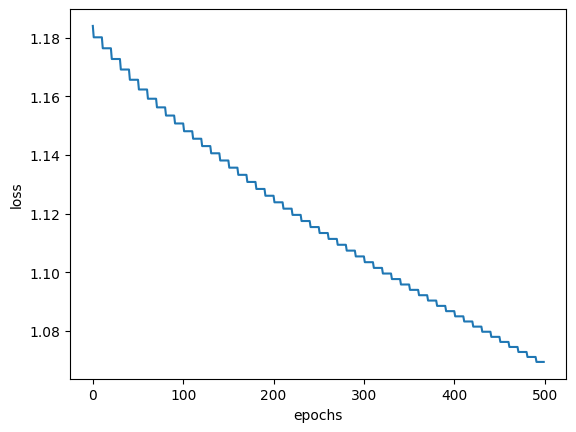

In [19]:
#Graph the losses

plt.plot(range(epochs), losses)
plt.ylabel("loss")
plt.xlabel("epochs")


In [20]:
#Eval;uating the model
with torch.no_grad():
    y_eval = model.forward(X_test) # applying model on our features
    loss = criterion(y_eval, y_test) # Find the loss or error
    

In [21]:
loss

tensor(1.0835)

In [22]:
correct =0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)

        print(f"{i+1} {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}")

        #Finding whether predictions match or not
        if (y_val.argmax().item() == y_test[i]):
            correct+=1
print(f" Correct predictions {correct}")


1 tensor([-0.2350, -0.2210,  0.6882]) 	 1 	 2
2 tensor([-0.1286, -0.2577,  0.3167]) 	 0 	 2
3 tensor([-0.2512, -0.2455,  0.6532]) 	 1 	 2
4 tensor([-0.3149, -0.2773,  0.6923]) 	 2 	 2
5 tensor([-0.1237, -0.2655,  0.2995]) 	 0 	 2
6 tensor([-0.1894, -0.2386,  0.4627]) 	 1 	 2
7 tensor([-0.2805, -0.2511,  0.7073]) 	 2 	 2
8 tensor([-0.1218, -0.2603,  0.2972]) 	 0 	 2
9 tensor([-0.3119, -0.2644,  0.7715]) 	 2 	 2
10 tensor([-0.1024, -0.2526,  0.3408]) 	 0 	 2
11 tensor([-0.2349, -0.2459,  0.5613]) 	 1 	 2
12 tensor([-0.2169, -0.2300,  0.5584]) 	 1 	 2
13 tensor([-0.0872, -0.2481,  0.3656]) 	 0 	 2
14 tensor([-0.2432, -0.2295,  0.6743]) 	 1 	 2
15 tensor([-0.1052, -0.2544,  0.3300]) 	 0 	 2
16 tensor([-0.3267, -0.2720,  0.7824]) 	 2 	 2
17 tensor([-0.1062, -0.2548,  0.3281]) 	 0 	 2
18 tensor([-0.3308, -0.2756,  0.7987]) 	 2 	 2
19 tensor([-0.1935, -0.2398,  0.4567]) 	 1 	 2
20 tensor([-0.1142, -0.2558,  0.3242]) 	 0 	 2
21 tensor([-0.1160, -0.2583,  0.3087]) 	 0 	 2
22 tensor([-0.2691, -0

In [25]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.7])


In [26]:
with torch.no_grad():
    print(model(new_iris))

tensor([-0.1207, -0.2563,  0.3233])


In [27]:
# Saving model
torch.save(model.state_dict(), "iris_model.pt")

In [28]:
new_model = simple_nn()
new_model.load_state_dict(torch.load('iris_model.pt'))

<All keys matched successfully>

In [29]:
new_model.eval()

simple_nn(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=3, bias=True)
)